# Dimentionality Reduction in Python

**Author:** Oscar Hernández Terán                                                                                 
**Date:** February 23, 2023

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### t-Distributed Stochastic Neighbor Embeddinf or t-SNE
Will maximize the distance in two-dimensional space

High learning rates will cause the algorithm to be more adventurous.

### ANSUR

In [2]:
ansur_df = pd.read_csv('data/ANSUR/ANSUR II FEMALE Public.csv')

In [3]:
types = pd.DataFrame(ansur_df.dtypes, columns=['type'])
list(types[types['type'] == 'object'].index)

['Gender',
 'Date',
 'Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'Ethnicity',
 'WritingPreference']

In [4]:
from sklearn.manifold import TSNE

In [5]:
# Non-numerical columns in the dataset
non_numeric = ['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference']

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(n_components=2, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(1986, 2)


In [6]:
tsne_features = pd.DataFrame({'x':tsne_features[:,0], 'y':tsne_features[:,1]})

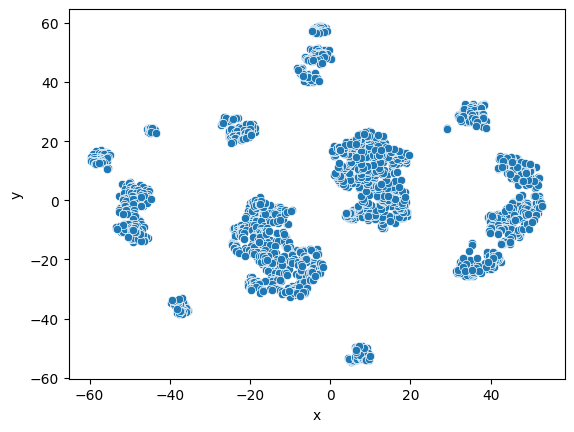

In [7]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", data=tsne_features)

# Show the plot
plt.show()

In [8]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue=____, data=df)

# Show the plot
plt.show()

NameError: name '____' is not defined

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

### The curse of dimensionality

In [ ]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

In [ ]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

In [ ]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

#### Features with missing values or little variance

In [ ]:
boxplot


In [ ]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [ ]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced DataFrame
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

#### Pairwise correlation


In [ ]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### Removing highly correlated features

In [ ]:
# Calculate the correlation matrix and take the absolute value
corr_df = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

### Selecting for model accuracy

### Selecting features for model performance 

In [ ]:
# Lets try to predcit the gender of ANSUR model
# Recursive feature elimination
from sklearn.feature_selection import RFE


```python
X.columns[rfe.support_]

print(dict(zip(X.columns, fre.ranking_)))
```

Values of 1 mean that features was keep in the dataset until the end while high values mean the feature was dropped early on